Count Vectorization and Naive Bayes Model

Benefits: NB is very fast and simple to use. NB classifier makes decisions by comparing two probabilites(the chances of an event). In other words, in our project the model comparing the chances of being fake or real of the article. If the probability of the article being fake is higher than being real, the model will classify it to be fake.

For text classification, we have to find some way to describe chunks of data that points to the labeled data as fake and real for the machine learning model. These descriptions are called as features. We will use the texts of the articles, so the feature would be described as the count of the most frequent words. 

We are prepping text with no punctuations, no whitespaces, no stopwords, no special characters and lemmatization will also be done. (If you load the clean dataset, this is not needed. Also, CV method has built-in models for prepocessing words!) Then, we will use supervised machine learning model. We can train a classifier by showing it all of the features of all the words, and let it try to figure out the more meaningful differences between a fake article and a real one, by simply looking for common frequent words. 

We will test it out to see how accurate it is with the most common words. Then, we will check whether accuracy and learning is correct, or whether we underfitter or overfitted the model. Then, we have to make it more balanced. 

In [110]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# a classic naive Bayes variant used in text classification 
# (typically where the data feature is represented as word vector counts just in out case

from sklearn.metrics import recall_score, precision_score, f1_score

In [2]:
df = pd.read_csv('sorted.csv')

In [3]:
df.shape

(38083, 7)

In [4]:
df.head()

,Unnamed: 0,title,text,subject,date,label,length
0,0,"as u.s. budget fight looms, republicans flip t...",the head of a conservative republican faction...,politicsnews,"december 31, 2017",0,4659
1,1,u.s. military to accept transgender recruits o...,donald trump just couldn t wish all americans ...,politicsnews,"december 29, 2017",0,4077
2,2,senior u.s. republican senator: 'let mr. muell...,transgender people will be allowed for the fi...,politicsnews,"december 31, 2017",0,2789
3,3,fbi russia probe helped by australian diplomat...,house intelligence committee chairman devin nu...,politicsnews,"december 30, 2017",0,2461
4,4,trump wants postal service to charge 'much mor...,"on friday, it was revealed that former milwauk...",politicsnews,"december 29, 2017",0,5204


In [5]:
new = df.drop(['Unnamed: 0', 'title', 'subject', 'date', 'length'], axis = 1)

In [ ]:
# import nltk
# from nltk import WordNetLemmatizer
# from nltk.corpus import stopwords


# #text cleaning for NLP
# #Removal of Punctuation Marks
# def remove_punctuations(text):
#     return re.sub('\[[^]]*\]', " ", text)

# Removal of Special Characters
# def remove_characters(text):
#     return re.sub("[^a-zA-Z]"," ",text)

# #Removal of stopwords 
# def remove_stopwords_and_lemmatization(text):
#     final_text = []
#     text = text.lower()
#     text = nltk.word_tokenize(text)
    
#     for word in text:
#         if word not in set(stopwords.words('english')):
#             lemma = nltk.WordNetLemmatizer()
#             word = lemma.lemmatize(word) 
#             final_text.append(word)
#     return " ".join(final_text)

# #Total function
# def cleaning(text):
#     text = remove_punctuations(text)
#     text = remove_characters(text)
#     text = remove_stopwords_and_lemmatization(text)
#     return text

# #Apply function on text column
# new['text'].apply(cleaning)

In [18]:
#I run again the cleaning and checked it. Did not remove stopwords correctly, so removed stopwords with CV later.
new


,text,label
0,the head of a conservative republican faction...,0
1,donald trump just couldn t wish all americans ...,0
2,transgender people will be allowed for the fi...,0
3,house intelligence committee chairman devin nu...,0
4,"on friday, it was revealed that former milwauk...",0
...,...,...
38078,21st century wire says all the world s a stage...,1
38079,randy johnson 21st century wirethe majority of...,1
38080,tune in to the alternate current radio network...,1
38081,21st century wire says a new front has just op...,1


In [40]:
new.to_csv('NLP_ready.csv')

In [49]:
df_x=new["text"]
df_y=new["label"]

In [50]:
cv = CountVectorizer()

In [ ]:
#we have to convert each word of text column into binary numbers
#we test it in small before applying solution to the whole dataset

In [51]:
#splitting the test and train data first for the test

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [52]:
x_traincv = cv.fit_transform(["Hello How are you How are you doing","Hi what's up","I cannot believe that"])

In [53]:
x_traincv.toarray()

#we gave examples as a form of list above, and it converted the items of the list into binary as below
# the numbers represents the count of the word within the list item 

array([[2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [54]:
cv.get_feature_names()
# this method gives us the words. If we compare it to the array above, we can see that 'are' is counted twice in the 
#first item, believe is counted 0, cannot is not there either...etc.

['are',
 'believe',
 'cannot',
 'doing',
 'hello',
 'hi',
 'how',
 'that',
 'up',
 'what',
 'you']

In [65]:
vectorizer = CountVectorizer(stop_words='english')

#I run the cleaning in the top cell on the dataset, but it did not remove stopwords efficiently, so I used here the 
#built-in method which worked CV() by default also converts text to lowercase and preprocess text

In [66]:
all_words = vectorizer.fit_transform(new.text.values.astype('U')) #needed to convert data to unicode

In [67]:
all_words.shape   
#we receive a sparce matrix = rows as per our original data, columns are almost 4 times more
#the columns represent the tokens of our text

(38083, 120948)

In [68]:
vectorizer.vocabulary_
#we can see the tokens by the coun

{'head': 50028,
 'conservative': 27898,
 'republican': 91169,
 'faction': 40508,
 'congress': 27759,
 'voted': 115045,
 'month': 72528,
 'huge': 52527,
 'expansion': 39959,
 'national': 74739,
 'debt': 31518,
 'pay': 81827,
 'tax': 105889,
 'cuts': 30254,
 'called': 22174,
 'fiscal': 42214,
 'sunday': 104009,
 'urged': 113036,
 'budget': 21079,
 'restraint': 91515,
 '2018': 4147,
 'keeping': 60119,
 'sharp': 97720,
 'pivot': 83682,
 'way': 116038,
 'republicans': 91173,
 'representative': 91102,
 'mark': 68229,
 'meadows': 69614,
 'speaking': 101212,
 'cbs': 23501,
 'face': 40427,
 'nation': 74738,
 'drew': 35699,
 'hard': 49431,
 'line': 64988,
 'federal': 41353,
 'spending': 101338,
 'lawmakers': 63568,
 'bracing': 19970,
 'battle': 16390,
 'january': 57187,
 'return': 91697,
 'holidays': 51683,
 'wednesday': 116281,
 'begin': 16897,
 'trying': 110134,
 'pass': 81478,
 'fight': 41881,
 'likely': 64864,
 'linked': 65035,
 'issues': 56471,
 'immigration': 53869,
 'policy': 84354,
 'nov

In [69]:
x_train.shape #have to run the test-train-split again

(30466,)

In [71]:
label=new["label"]  #renaming for better readability

In [88]:
x_train, x_test, y_train, y_test = train_test_split(all_words, label, test_size=0.2, random_state=75)

In [89]:
x_train.shape 

(30466, 120948)

In [90]:
x_test.shape

(7617, 120948)

In [93]:
classifier = MultinomialNB() #creating the Naive Bayes Model

In [97]:
classifier.fit(x_train, y_train) #training the model with our CV-d text data and labels

MultinomialNB()

In [98]:
# I want the number of tokens labeled correctly, the number of tokens labeled incorrectly and the accuracy of the model

correct = (y_test == classifier.predict(x_test)).sum()

In [100]:
print(f'{correct} number of words classified correctly.')

6060 number of words classified correctly.


In [101]:
incorrect = y_test.size - correct

In [102]:
print(f'Number of words classified incorrectly is: {incorrect}.')

Number of words classified incorrectly is: 1557.


In [103]:
accuracy = incorrect / (incorrect + correct)

In [108]:
print(f'The accuracy of the Naive Bayes model is: {1-accuracy:.2%}.') #.2% converts the result into percentage

The accuracy of the Naive Bayes model is: 79.56%.


In [ ]:
#there is a method of scikit to calculate accuracy

In [109]:
classifier.score(x_test, y_test)

0.7955888144938952

The confusion matrix is another metric to measure the performance of a classification algorithm.
The predicted binary classes are demonstrated in the columns of the matrix. 
The ctual classes are in the rows of the matrix. 

True positives (TP): the cases for which the classifier predicted ‘fake’ and the articles were actually fake.
True negatives (TN): the cases for which the classifier predicted ‘real’ and the articles were actually real.
False positives (FP): the cases for which the classifier predicted ‘fake’ but the articles were actually real.
False negatives (FN): the cases for which the classifier predicted ‘real’ but the articles were actually fake.

In other words:
true prediction = correct prediction
false prediction = incorrect prediction
positive/negative = prediction of the expected class (positive = fake, negative = true)

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, classifier.predict(x_test))
print(cm)

#Out of the 4133 actual real articles, it predicted incorrectly 487 of them.
#Out of the 3484 actual fake articles, it predicted correctly 2414 of them.
#accuracy = TP+TN / TP+TN+FP+FN

TN = 3646
TP = 2414
FN = 1070
FP = 487

accuracy_NB = (TP+TN) / (TP+TN+FP+FN)
print(f'Out of the {TN+FP} actual real articles, the model predicted incorrectly {FP} articles as fake.')
print(f'Out of the {FN+TP} actual fake articles, the model predicted correctly {TP} articles as fake.')
print(f'The accuracy of the model is: {accuracy_NB:.2%}')

[[3646  487]
 [1070 2414]]
Out of the 4133 actual real articles, the model predicted incorrectly 487 articles as fake.
Out of the 3484 actual fake articles, the model predicted correctly 2414 articles as fake.
The accuracy of the model is: 79.56%


Out of the 4133 actual real articles, it predicted incorrectly 487 of them as fake.
Out of the 3484 actual fake articles, it predicted correctly 2414 of them.


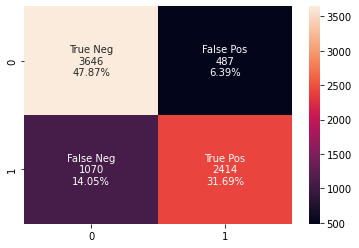

In [137]:
import seaborn as sns
sns.set_palette(palette='flare')

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="")

print('Out of the 4133 actual real articles, it predicted incorrectly 487 of them as fake.')
print('Out of the 3484 actual fake articles, it predicted correctly 2414 of them.')

Precision, recall and f1-score(there are methods for all in scikit library)

Precision: it is the number of cases when the model predicts positive results.
This is obtained by calculating: TP / (TP+FP)
Precision is usually used when the goal is to limit the number of false positives (FP).

Recall:  it is the number of cases when the model predicts the positive results out of positive cases.
This is obtained by calculating: TP / (TP+FN)
Also calles as True positive ratio.
The goal is to limit the number of false negatives (FN).

f1-score: the balance of the means of precision and recall:
This is obtained by calculating: 
2 x (precision x recall) / (precision + recall)
It is important for optimization. 

In [146]:
#calculating the recall score

recall_score(y_test, classifier.predict(x_test))


0.6928817451205511

In [143]:
#calculating the precision score

precision_score(y_test, classifier.predict(x_test))

0.832126852809376

In [147]:
#calculating the f1 score

f1_score(y_test, classifier.predict(x_test))

0.7561472200469852

In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, classifier.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      4133
           1       0.83      0.69      0.76      3484

    accuracy                           0.80      7617
   macro avg       0.80      0.79      0.79      7617
weighted avg       0.80      0.80      0.79      7617



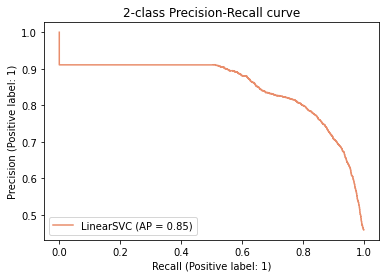

In [161]:
#Plotting the precision-recall curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, x_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Each point in the plot corresponds to a different threshold. 
Where threshold equals to 0, recall is 1.
Whereas threshold equal to 1 indicates that the recall is 0. 
So the threshold varies from 0 to 1 from the top-left to the bottom-right of the plot. 
Note that the precision starts at around 0.5, as there aren’t many false positives.

With the precision-recall curve, the closer it is to the top-right corner, the better the algorithm. And hence a larger area under the curve shows that the algorithm has higher recall and higher precision. It is important to check average precision score and to plot it accordingly. It is again 71%. We can conclude our model is quite accurate.

In [163]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, classifier.predict(x_test))

0.7170407586604021